In [1]:
import pandas as pd

In [2]:
listen_count = pd.read_csv('data/train_triplets.txt.zip', header=None, delimiter='\t')

In [3]:
listen_count.head()

,0,1,2
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [4]:
listen_count[2]

0           1
1           1
2           2
3           1
4           1
5           1
6           2
7           1
8           1
9           1
10          1
11          1
12          1
13          5
14          1
15          1
16          1
17          1
18          1
19          1
20          1
21          1
22          1
23          1
24          1
25          1
26          1
27          1
28          1
29          1
           ..
48373556    1
48373557    1
48373558    1
48373559    2
48373560    1
48373561    2
48373562    1
48373563    1
48373564    4
48373565    1
48373566    1
48373567    1
48373568    1
48373569    1
48373570    1
48373571    1
48373572    1
48373573    1
48373574    6
48373575    1
48373576    2
48373577    1
48373578    1
48373579    1
48373580    1
48373581    2
48373582    1
48373583    1
48373584    3
48373585    1
Name: 2, Length: 48373586, dtype: int64

In [5]:
listen_count[2] = 1

In [6]:
listen_count[2].head()

0    1
1    1
2    1
3    1
4    1
Name: 2, dtype: int64

## 在YELP数据集中可视化商户评论计数

In [7]:
import json

In [8]:
bize_file = open('data/business.json')

In [9]:
bize_df = pd.DataFrame([json.loads(x) for x in bize_file.readlines()])

In [10]:
bize_file.close()

In [30]:
bize_df.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Occurrence')

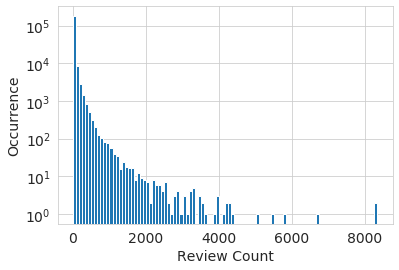

In [28]:
### Plot the histogram of the review counts
sns.set_style('whitegrid')
fig, ax = plt.subplots()
bize_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

Text(0, 0.5, 'Occurrence')

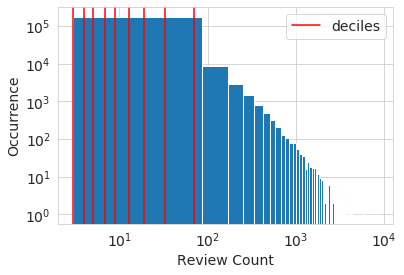

In [26]:
### Visualize the deciles on the histogram
deciles = bize_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
sns.set_style('whitegrid')
fig, ax = plt.subplots()
bize_df['review_count'].hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)